# Modeling Iowa Liquor Database

In [1]:

# i am looking for predicted mezcal stores that are not mezcal stores
# type 1 error false positives is actually what I am hoping to discover
# with the idea being type 1 error is actually unrealized potential


# i am also looking for feature importance, in an attempt to understand my clients.

In [2]:
# import libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from sklearn.decomposition import PCA, TruncatedSVD

import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 999)

In [3]:
# this dataframe is just groupby store not time periods, and contains all the features
small = pd.read_csv('iowa_micro2.csv')

In [4]:
small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225053 entries, 0 to 225052
Data columns (total 95 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Store Name                                   225053 non-null  object 
 1   Address                                      225053 non-null  object 
 2   City                                         225053 non-null  object 
 3   Zip Code                                     225053 non-null  int64  
 4   County                                       225053 non-null  object 
 5   Category Name                                225053 non-null  object 
 6   Bottle Price Category                        225053 non-null  object 
 7   Category Name_BOURBON WHISKY                 225053 non-null  float64
 8   Category Name_BRANDY                         225053 non-null  float64
 9   Category Name_CANADIAN WHISKY                225053 non-nul

In [5]:
# remove the categorical columns for clustering
small_cluster = small.iloc[:,8:]

In [6]:
# and the answers the to the test
small_cluster = small_cluster.drop(columns=['total_ranking', 'OE_ranking'])

In [7]:
small_cluster.shape

(225053, 85)

### Steps:

1. Clustering
3. Support Vector Machine
4. Random Forest

In [8]:
#define PCA model to use
pca = PCA(n_components=10, random_state=12)

#fit PCA model to data
pca_fit = pca.fit(small_cluster)

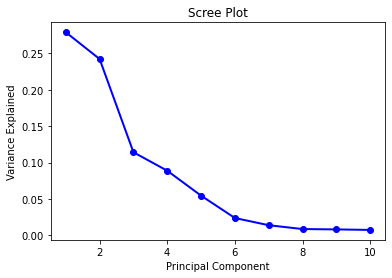

In [9]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [10]:
print(pca.explained_variance_ratio_)

[0.27899861 0.24220742 0.1141782  0.08882338 0.0545745  0.02389255
 0.01397982 0.00872217 0.00821632 0.00753246]


In [11]:
#define TruncatedSVD model to use
trunc_svd = TruncatedSVD(n_components=10, random_state=12, n_iter=10, algorithm='randomized')

#fit PCA model to data
svd_fit = trunc_svd.fit(small_cluster)

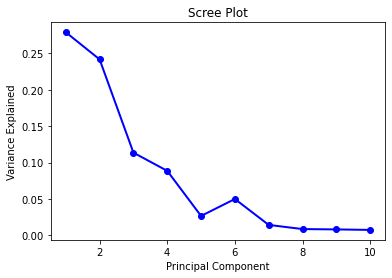

In [12]:
svd_values = np.arange(10) + 1
plt.plot(svd_values, trunc_svd.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [13]:
# small randomized
print(trunc_svd.explained_variance_ratio_)

[0.27895604 0.24167532 0.11364992 0.08866879 0.02675612 0.05005119
 0.01445442 0.00875513 0.00827792 0.00759433]


In [14]:
# using the truncated svd

#fit PCA model to data
small_transformed = trunc_svd.fit_transform(small_cluster)

In [15]:
#######################

# Birch clustering
# hierarchial clustering
## default setting is threshold 0.5 and n_clusters=3

model = Birch(n_clusters=100, branching_factor = 15)

# fit on unsuper data 'iowa'
model.fit(small_transformed)  

Birch(branching_factor=15, n_clusters=100)

In [16]:
##########################
# cluster assignment
y_pred = model.predict(small_transformed)

# unique clusters
clusters = np.unique(y_pred)  

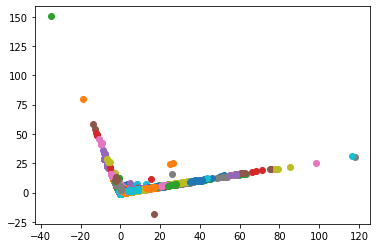

In [18]:
# scatter plot
for c in clusters:
    row_idx = np.where(y_pred == c)
    plt.scatter(small_transformed[row_idx, 0], small_transformed[row_idx, 1])

plt.show()

# increase size of plot

In [19]:
prediction = pd.DataFrame(y_pred)

In [20]:
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0     17]
 [     1     23]
 [     2     10]
 [     3      4]
 [     4     20]
 [     5   1995]
 [     6     14]
 [     7     18]
 [     8      8]
 [     9     70]
 [    10      4]
 [    11    578]
 [    12      5]
 [    13   3282]
 [    14     34]
 [    15     74]
 [    16      8]
 [    17      6]
 [    18      3]
 [    19    176]
 [    20   1058]
 [    21   1680]
 [    22    159]
 [    23      3]
 [    24    116]
 [    25     92]
 [    26     42]
 [    27      3]
 [    28     99]
 [    29      3]
 [    30 164339]
 [    31      2]
 [    32      2]
 [    33     17]
 [    34      2]
 [    35      8]
 [    36     64]
 [    37     23]
 [    38      9]
 [    39     57]
 [    40     27]
 [    41     59]
 [    42     37]
 [    43     20]
 [    44   4369]
 [    45      8]
 [    46      6]
 [    47    401]
 [    48     12]
 [    49     32]
 [    50     10]
 [    51      1]
 [    52   4073]
 [    53   6331]
 [    54      1]
 [    55      2]
 [    56    344]
 [    57     82]
 [    58     1

In [21]:
test3 = pd.concat([small[['Store Name','total_ranking']], prediction], axis=1)

In [23]:
test3 = test3.groupby(['Store Name', 'total_ranking']).agg({0:['mean','min','max',pd.Series.mode, 'std','var','skew']})

In [24]:
test3 = test3.reset_index()

In [25]:
test3

Store Name total_ranking          0  \
                                                                         mean   
0                             1st stop beverage shop       1681.00  36.132530   
1                              A a and m inc / perry       2808.50  34.319481   
2                                  Adventureland inn       1830.00  36.896552   
3                    Afal food & liquor / des moines      66049.00  30.429825   
4                              Allcool liquors / wdm       3600.00  33.484733   
5                                       Av superstop      66049.00  33.677043   
6                        Best food mart / des moines      66049.00  32.336406   
7                              Best food mart 3  llc       1681.00  33.299346   
8                                          Best trip      66049.00  33.437956   
9        Blind pig cocktail bodega / west des moines       2214.00  30.626761   
10                                    Bluejay market        500.50  37.240881   
11                                   Bottle boutique       6228.00  37.760546   
12                          Brick street market, llc       5544.00  35.678571   
13                              Broadbent distillery      66049.00  34.574257   
14                                    C fresh market      66049.00  35.475584   
15                            Casey's #2654 / stuart      66049.00  32.462069   
16                            Casey's #3746 / grimes      66049.00  36.256410   
17                            Casey's #3934 / ankeny      66049.00  31.972222   
18           Casey's general store # 1861/ bondurant      66049.00  34.314286   
19              Casey's general store # 2177/mitchel      66049.00  35.332180   
20              Casey's general store # 2179/ waukee      66049.00  34.539683   
21               Casey's general store # 2253/ clive      66049.00  36.786942   
22               Casey's general store # 2698/ perry      66049.00  34.810606   
23              Casey's general store # 2783/ urband      66049.00  35.062295   
24             Casey's general store # 2870/ altoona      66049.00  35.487179   
25              Casey's general store # 3507/ grimes      66049.00  35.447368   
26           Casey's general store # 3512/ indianola      66049.00  35.906810   
27          Casey's general store # 3518/ des moines      66049.00  33.116915   
28           Casey's general store #1062 / winterset      66049.00  35.205575   
29           Casey's general store #1144 / polk city      66049.00  33.994253   
30           Casey's general store #1373 / bondurant      66049.00  34.189189   
31              Casey's general store #14 / carlisle      66049.00  32.424242   
32                Casey's general store #1428 / milo      66049.00  34.740741   
33           Casey's general store #1493 / van meter      66049.00  36.922872   
34              Casey's general store #1534 / guthri      66049.00  36.071429   
35              Casey's general store #1548 / ankeny      66049.00  34.010870   
36           Casey's general store #1623 / indianola      66049.00  33.254098   
37              Casey's general store #1659 / ankeny      66049.00  32.636364   
38            Casey's general store #1676 / carlisle      66049.00  33.500000   
39                Casey's general store #1680 / adel      66049.00  33.767123   
40           Casey's general store #1706 / winterset      66049.00  34.025449   
41          Casey's general store #1901 / des moines      66049.00  33.867069   
42           Casey's general store #1908 / indianola      66049.00  34.851282   
43            Casey's general store #1910 / johnston      66049.00  33.518182   
44             Casey's general store #1938 / altoona      66049.00  32.405405   
45              Casey's general store #1941 / ankeny      66049.00  36.057143   
46           Casey's general store #2097 / indianola      66049.00  33.431818   
47               Casey's general store #2099 / clive      66049.00  33.67

In [26]:
pd.concat([small, test3.loc[:, 0].loc[:,'var']], axis=1)

,Store Name,Address,City,Zip Code,County,Category Name,Bottle Price Category,Category Name_BOURBON WHISKY,Category Name_BRANDY,Category Name_CANADIAN WHISKY,...,Sale (Dollars),Volume Sold (Liters),Profit / Item,Profit / Invoice,Profit / ml,Retail Price / ml,total_ranking,OE_BPC,OE_ranking,var
0,1st stop beverage shop,2839 East University Ave.,DES MOINES,50317,POLK,BOURBON WHISKY,Expensive,0.0,0.0,0.0,...,-0.162803,-0.161489,2.252836,-0.061991,0.446920,0.447108,1681.0,2.0,35.0,291.719966
1,1st stop beverage shop,2839 East University Ave.,DES MOINES,50317,POLK,BOURBON WHISKY,Expensive,0.0,0.0,0.0,...,-0.156890,-0.160950,2.465500,-0.046327,0.507360,0.507549,1681.0,2.0,35.0,224.926312
2,1st stop beverage shop,2839 East University Ave.,DES MOINES,50317,POLK,BOURBON WHISKY,Expensive,0.0,0.0,1.0,...,-0.155709,-0.160411,1.693270,0.217374,0.287889,0.288004,1681.0,2.0,35.0,559.256616
3,1st stop beverage shop,2839 East University Ave.,DES MOINES,50317,POLK,BOURBON WHISKY,Inexpensive,0.0,0.0,0.0,...,0.070927,0.087941,-0.244132,0.021591,-0.246889,-0.246752,1681.0,0.0,35.0,21.061404
4,1st stop beverage shop,2839 East University Ave.,DES MOINES,50317,POLK,BOURBON WHISKY,Inexpensive,0.0,0.0,0.0,...,0.103724,0.179403,-0.252224,-0.061574,-0.259652,-0.259543,1681.0,0.0,35.0,228.120225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225048,Your private bar / urbandale,3040 104th St STE 3056,URBANDALE,50322,POLK,WHISKY,Normal,0.0,0.0,0.0,...,-0.166774,-0.161992,0.129841,-0.218358,2.281892,2.282127,3157.0,1.0,50.0,NaN
225049,Your private bar / urbandale,3040 104th St STE 3056,URBANDALE,50322,POLK,WHISKY,Normal,0.0,0.0,0.0,...,-0.158166,-0.153045,0.188570,-0.071394,-0.216359,-0.216202,3157.0,1.0,50.0,NaN
225050,Your private bar / urbandale,3040 104th St STE 3056,URBANDALE,50322,POLK,WHISKY,Normal,0.0,0.0,1.0,...,-0.158403,-0.157393,0.179450,-0.138580,-0.158967,-0.158794,3157.0,1.0,50.0,NaN
225051,Your private bar / urbandale,3040 104th St STE 3056,URBANDALE,50322,POLK,WHISKY,Normal,0.0,1.0,0.0,...,-0.151495,-0.153369,0.117074,0.059986,0.831409,0.831581,3157.0,1.0,50.0,NaN


In [27]:
# create a dictionary for mapping 
var_map_dict = dict(zip(test3['Store Name'], test3.loc[:, 0].loc[:,'var']))

In [28]:
# map over the ranking value
small['var'] = small['Store Name'].replace(var_map_dict.keys(), var_map_dict.values(), regex=True)

In [29]:
small

,Store Name,Address,City,Zip Code,County,Category Name,Bottle Price Category,Category Name_BOURBON WHISKY,Category Name_BRANDY,Category Name_CANADIAN WHISKY,...,Sale (Dollars),Volume Sold (Liters),Profit / Item,Profit / Invoice,Profit / ml,Retail Price / ml,total_ranking,OE_BPC,OE_ranking,var
0,1st stop beverage shop,2839 East University Ave.,DES MOINES,50317,POLK,BOURBON WHISKY,Expensive,0.0,0.0,0.0,...,-0.162803,-0.161489,2.252836,-0.061991,0.446920,0.447108,1681.0,2.0,35.0,291.719966
1,1st stop beverage shop,2839 East University Ave.,DES MOINES,50317,POLK,BOURBON WHISKY,Expensive,0.0,0.0,0.0,...,-0.156890,-0.160950,2.465500,-0.046327,0.507360,0.507549,1681.0,2.0,35.0,291.719966
2,1st stop beverage shop,2839 East University Ave.,DES MOINES,50317,POLK,BOURBON WHISKY,Expensive,0.0,0.0,1.0,...,-0.155709,-0.160411,1.693270,0.217374,0.287889,0.288004,1681.0,2.0,35.0,291.719966
3,1st stop beverage shop,2839 East University Ave.,DES MOINES,50317,POLK,BOURBON WHISKY,Inexpensive,0.0,0.0,0.0,...,0.070927,0.087941,-0.244132,0.021591,-0.246889,-0.246752,1681.0,0.0,35.0,291.719966
4,1st stop beverage shop,2839 East University Ave.,DES MOINES,50317,POLK,BOURBON WHISKY,Inexpensive,0.0,0.0,0.0,...,0.103724,0.179403,-0.252224,-0.061574,-0.259652,-0.259543,1681.0,0.0,35.0,291.719966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225048,Your private bar / urbandale,3040 104th St STE 3056,URBANDALE,50322,POLK,WHISKY,Normal,0.0,0.0,0.0,...,-0.166774,-0.161992,0.129841,-0.218358,2.281892,2.282127,3157.0,1.0,50.0,189.873257
225049,Your private bar / urbandale,3040 104th St STE 3056,URBANDALE,50322,POLK,WHISKY,Normal,0.0,0.0,0.0,...,-0.158166,-0.153045,0.188570,-0.071394,-0.216359,-0.216202,3157.0,1.0,50.0,189.873257
225050,Your private bar / urbandale,3040 104th St STE 3056,URBANDALE,50322,POLK,WHISKY,Normal,0.0,0.0,1.0,...,-0.158403,-0.157393,0.179450,-0.138580,-0.158967,-0.158794,3157.0,1.0,50.0,189.873257
225051,Your private bar / urbandale,3040 104th St STE 3056,URBANDALE,50322,POLK,WHISKY,Normal,0.0,1.0,0.0,...,-0.151495,-0.153369,0.117074,0.059986,0.831409,0.831581,3157.0,1.0,50.0,189.873257


In [ ]:
small.to_csv('iowa_model_part_1.csv', index=False)